In [3]:
##라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('./data/boston.csv')

In [9]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
##Feature Selection
#상관계수와 공분산 기준으로 해보자  - 그러면 범주형데이터, 비정형 데이터는 못쓰겠지..?
del data['chas']
##del로 제거 하지만 데이터 제거는 굉장히 신중해야함
##연습이니 일단 삭제해보는데 원래는 정말 필요없는지 확실한 검증이 필요함
#가설 1. 범죄율과 집값간의 관계?

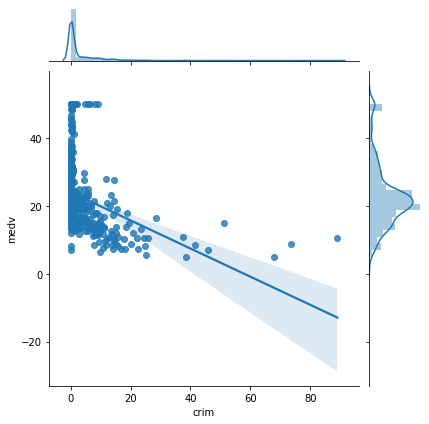

In [12]:
##그래프를 일단 그래요자
sns.jointplot(data = data, x= 'crim', y = 'medv', kind = 'regg')

In [13]:
##그림상 가설이 아예 틀렸다고 할 수 있지만 드라마틱한 상관관계는 없군
#공분산 체크
#단일변수로 보려면 x.cov(y)
data.cov()
#이렇게 보면 어질어질하지

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,73.986578,-40.215956,23.992339,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-40.215956,543.936814,-85.412648,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,23.992339,-85.412648,47.064442,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
nox,0.419594,-1.396148,0.607074,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
rm,-1.325038,5.112513,-1.887957,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
age,85.405322,-373.901548,124.513903,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
dis,-6.876722,32.629304,-10.228097,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
rad,46.847761,-63.348695,35.549971,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
tax,844.821538,-1236.453735,833.360290,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716
ptratio,5.399331,-19.776571,5.692104,0.047397,-0.540763,15.936921,-1.059775,8.760716,168.153141,4.686989,-35.059527,5.782729,-10.110657


In [14]:
data['crim'].cov(data['medv'])

-30.718507964458176

In [15]:
data['crim'].corr(data['medv'])
#그렇게 유의미하지는..? 하지만 사회과학 분야에서 이정도면 무의미하진 않지

-0.3883046085868114

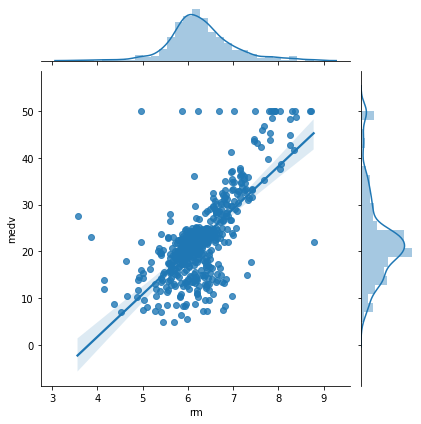

In [17]:
##가설 2 : 방의 개수와 집값의 상관 (그렇겠지 면적이 넓으니까)
sns.jointplot(data = data, x = 'rm', y = 'medv', kind = 'regg')

In [18]:
data['rm'].corr(data['medv'])
#이건 확실히 강하다고 할 수 있지

0.6953599470715387

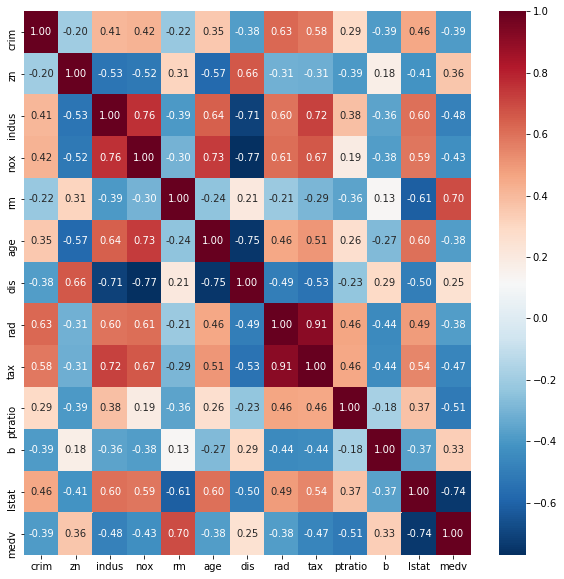

In [21]:
##한눈에 볼려면 히트맵을 사용해보자
fig, ax = plt.subplots( figsize = (10,10))
##도화지 키우는 다른 방법
#plt.figure(figsize = (10,10))
sns.heatmap(data.corr() ,
            cmap = 'RdBu_r', 
            annot = True,
           fmt = '.2f')

In [22]:
##PCA를 이용하여 변수 셀렉션을 해보자
corr_bar = []
for column in data.columns:
    print(f"{column}과 짒값의 상관계수 : {data[column].corr(data['medv'])}")
    corr_bar.append(data[column].corr(data['medv']))

crim과 짒값의 상관계수 : -0.3883046085868114
zn과 짒값의 상관계수 : 0.3604453424505433
indus과 짒값의 상관계수 : -0.4837251600283728
nox과 짒값의 상관계수 : -0.4273207723732824
rm과 짒값의 상관계수 : 0.6953599470715387
age과 짒값의 상관계수 : -0.37695456500459606
dis과 짒값의 상관계수 : 0.24992873408590388
rad과 짒값의 상관계수 : -0.38162623063977746
tax과 짒값의 상관계수 : -0.46853593356776696
ptratio과 짒값의 상관계수 : -0.5077866855375615
b과 짒값의 상관계수 : 0.33346081965706637
lstat과 짒값의 상관계수 : -0.7376627261740148
medv과 짒값의 상관계수 : 1.0


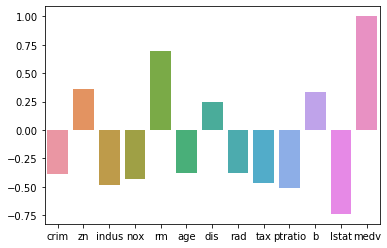

In [23]:
#bat plot그려보자
sns.barplot(data.columns, corr_bar)

crim과 짒값의 상관계수 : -0.3883046085868114
zn과 짒값의 상관계수 : 0.3604453424505433
indus과 짒값의 상관계수 : -0.4837251600283728
nox과 짒값의 상관계수 : -0.4273207723732824
rm과 짒값의 상관계수 : 0.6953599470715387
age과 짒값의 상관계수 : -0.37695456500459606
dis과 짒값의 상관계수 : 0.24992873408590388
rad과 짒값의 상관계수 : -0.38162623063977746
tax과 짒값의 상관계수 : -0.46853593356776696
ptratio과 짒값의 상관계수 : -0.5077866855375615
b과 짒값의 상관계수 : 0.33346081965706637
lstat과 짒값의 상관계수 : -0.7376627261740148
medv과 짒값의 상관계수 : 1.0


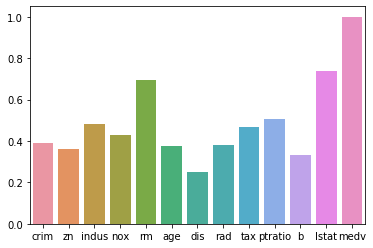

In [24]:
corr_bar = []
for column in data.columns:
    print(f"{column}과 짒값의 상관계수 : {data[column].corr(data['medv'])}")
    corr_bar.append(abs(data[column].corr(data['medv'])))

sns.barplot(data.columns, corr_bar)

In [25]:
#위에서 상대적으로 상관계수가 낮은 2개를 하나로 뭉쳐보자
x = data[['dis','b']]

In [26]:
## PCA해보자
from sklearn.decomposition import PCA
##PCA(n_components) 객채생성, 몇개 변수만들지
##PCA.fit(x) 데이터 학습
##PCA.components_ 앞의 학습으로 만들어진 변수속에 반영된 이 전 변수의 분산정도
##PCA.explained_variance_ratio_ 새로운 변수가 설명하는 분산의 비율
##PCA.trasform : 학습내용을 바탕으로 x의 데이터를 변환 

In [29]:
pca = PCA(n_components = 1)  ##PCA라는 객체로 이름 붙여버려

In [30]:
pca.fit(x) ##학습시킴

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_  ##아래의 값을 보면 b라는 변수의 설명을 거의 다 담아버렸다. 이렇게 되면 black의 변수를 하나 복제한 것밖에 안된다.

array([[-0.00672682, -0.99997737]])

In [32]:
##정규화를 안시켜줘서 그럼
##일단 새로만든 PC1이 설명하는 기존의 변수 분산 설명
pca.explained_variance_ratio_

array([0.9995135])

In [33]:
##새로운 데이터를 pc1이라는 칼럼에 추가
data['pc1'] = pca.transform(x)
##fit_transform을 하면 fit과 변환을 동시에 진행하는 것
##transform은 위에서 했던 fit을 바탕으로 변환만 하는 것
##앞으로는 위의 두 과정이 다를 것임. 주의

In [34]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


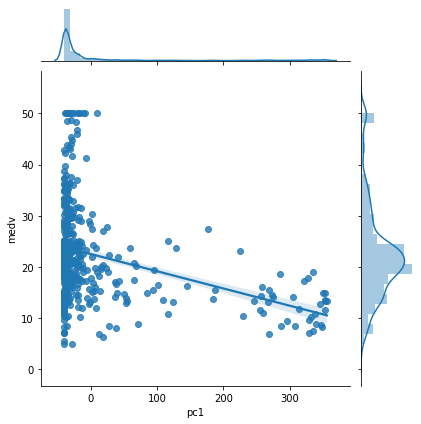

In [35]:
sns.jointplot(data=data, x='pc1', y='medv', kind = 'regg')

In [36]:
data['pc1'].corr(data['medv'])
##기존의 b와 집값의 상관계수와 거의 차이가 없음
##이런 변수는 쓸모없다는 것임

-0.33348451067418966

In [37]:
## 정규화를 진행해서 다시 한번 해보자
#StandardScaler() 정규화 객체 생성
#scaler.fit(x) 정규화 객체로 학습
#scaler.transform(x) 학습된 학습기로 변수x의 데이터를 변환

In [38]:
##정규화 library 불러오자
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(x)
scaler_x = scaler.transform(x)
##학습시키는 데이터와 변형시키는 데이터가 같아서 동시에 처리해도 상관은 없음

In [41]:
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [42]:
pca = PCA(n_components = 1)
pca.fit(scaler_x)
pca.components_  
##두 변수의 분산이 동일한 비중으로  설정됨을 확일 할 수 있음

array([[-0.70710678, -0.70710678]])

In [43]:
pca.explained_variance_ratio_
##아까보다 낮아졌는데 그것은 아까는 흑인컬럼을 그대로 가져와버렸고 지금은 적절히 섞였기 떄문

array([0.64575584])

In [44]:
data['pc1'] = pca.transform(scaler_x)

In [45]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946


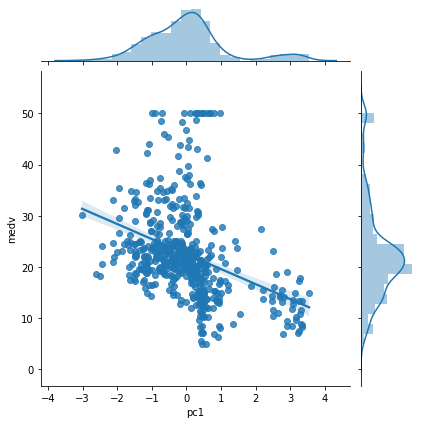

In [46]:
sns.jointplot(data = data , x = 'pc1' , y='medv', kind = 'regg')

In [47]:
data['pc1'].corr(data['medv'])
##절대값이 0.03만큼 커졌는데 이정도면 잘 합쳤다할만함 
## 그 기준은??? -> 생각해볼것

-0.36298985100090175

In [48]:
##비지도학습 - clustering 해보기
##방법은 굉장히 많다. 가장 기본적 알고리즘을 배우고 한계점과 계량버전을 공부해보자
## K-means를 사용해볼건데 주어진 값들 사이의 유클리디안 거리를 이용
## 처음의 임의의 기준점을 제시해야한다는 것인데...
## 이게 문제가 될 수 있지..
## 군집별 중심값에서 중심간의 거리를 기반으로 군집화..

##거리이용  -> 범주형에 적용하기 어려움
##반복되는 작업 수행
##짧은 계산시간
## 사전정보가 특별히 필요없다는 점은 장점일 수 있지만 단점이 될 지도..

## 그렇다면 K는 몇개로 설정하는 것이 좋을까? -> 굉장히 어려운 얘기 , 해석에 따라 달라지는..
## Elbow point 찾기 - 꺾인점
##  k-means는 오브젝트와 거리의 제곱합이 비용함수임
##  k의 개수는 증가하지만 비용함수는 차이나지 않는 지점을 elbow point로 보는 것이..

In [49]:
##라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('./data/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
##군집화에 범주화를 쓰면 처리가 필요하므로.. 범주화를 지우고
## PCA로 변수를 2개로 줄여서 진행해보자

In [52]:
##차원축소를 먼저 해보자
del data['chas']

In [53]:
medv = data['medv']
del data['medv']
## 집값데이터가 y값으로 사용되는 건데 분석에 들어가면 안되겠지요 그래서 따로 떼어 둡니다

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
##정규화 진행과 객체 생성
scaler = StandardScaler()

In [56]:
#학습
scaler.fit(data)
#변환
scaler_data = scaler.transform(data)

In [57]:
#객체 생성
pca = PCA(n_components = 2)

In [58]:
#PCA 학습시키기
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
##결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [60]:
##군집화하려면 데이터프레임 형태여야하니까 변환
data2 = pd.DataFrame(pca.transform(scaler_data), columns = ['pc1','pc2'])

In [61]:
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


In [62]:
##엘보포인트를 먼저 찾아보자
# KMeans(n_cluster = k ) k 개 군집화 할거에요
# KMeans.fit() 학습시키기
# KMeans.inertia_ 응집도 확인 , 이때 inertia가 군집 중심까지의 거리이므로 낮을수록 군집화가 더 잘된것
# KMeans.predict(data) 학습된 데이터를 기반으로 변환

In [63]:
 #라이브러리 불러오기
from sklearn.cluster import KMeans

In [64]:
x = [] #k가 몇개인지
y = [] #응집도 

for k in range(1,31):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

In [65]:
y

[3779.414230365951,
 1428.2418998744047,
 776.2688476691682,
 517.339316456147,
 401.2440394722096,
 299.3385910968542,
 236.06369060796504,
 204.39704207154819,
 184.13807269888932,
 157.90278493802506,
 147.5369643822043,
 134.14903876069627,
 126.57920886351533,
 115.92068040486011,
 108.00462511368407,
 101.90588525256324,
 94.50383589053726,
 88.30190467587775,
 84.68436143843365,
 80.26703699769952,
 75.11029815267204,
 69.1241376719087,
 66.42372601840597,
 63.27729052676325,
 62.970979346555524,
 58.361304861667826,
 56.368018870550614,
 55.001003484998535,
 52.4549070219424,
 50.5281973954626]

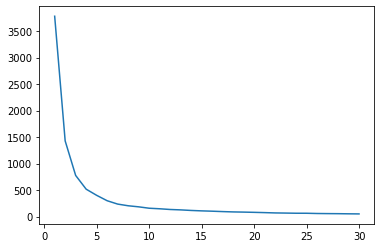

In [69]:
plt.plot(x, y)
##4까지 하면 괜찮겠네

In [70]:
kmeans = KMeans(n_clusters = 4)

In [71]:
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
data2['labels'] = kmeans.predict(data2)

In [73]:
data2.head()
##labels에서 0은 그룹임

,pc1,pc2,labels
0,-2.097234,-0.720179,3
1,-1.456003,-0.947694,3
2,-2.073454,-0.625336,3
3,-2.610161,-0.134044,3
4,-2.456866,-0.229919,3


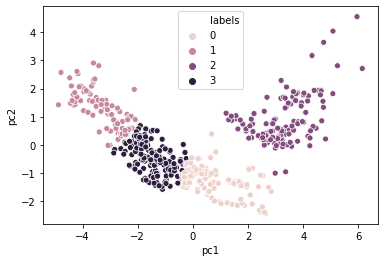

In [74]:
#hue는 구분자
sns.scatterplot(x='pc1', y = 'pc2', hue = 'labels', data = data2)

In [75]:
data2['medv']=medv

In [76]:
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,3,24.0
1,-1.456003,-0.947694,3,21.6
2,-2.073454,-0.625336,3,34.7
3,-2.610161,-0.134044,3,33.4
4,-2.456866,-0.229919,3,36.2


In [78]:
data2[data2['labels']==0]['medv'].mean()

19.769827586206887

In [79]:
##시각화를 위해 각 그룹별 medv값을 따로 변수로 생성
medv_0 =data2[data2['labels']==0]['medv'].mean()
medv_1 =data2[data2['labels']==1]['medv'].mean()
medv_2 =data2[data2['labels']==2]['medv'].mean()
medv_3 =data2[data2['labels']==3]['medv'].mean()

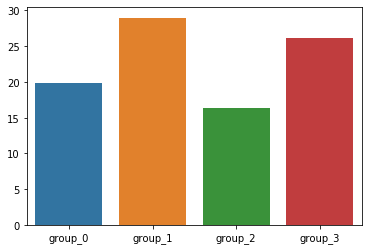

In [80]:
sns.barplot(x= ['group_0', 'group_1', 'group_2', 'group_3'], y = [medv_0, medv_1, medv_2, medv_3])

In [83]:
##그룹별 특성분석을 위해 원본데이터에 라벨 넣기
data['labels'] = data2['labels']

In [84]:
#각 그룹데이터를 나눠 담자
group = data[(data['labels']==1) |(data['labels']==2) ]

In [85]:
group

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,1
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,1
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,1
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,1
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,3.67367,0.0,18.10,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,2
486,5.69175,0.0,18.10,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,2
487,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,2
489,0.18337,0.0,27.74,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,2


In [89]:
##group이라는 변수가 지금 라벨 1,2를 같이 넣었지 얘들을 groupby함수를 이용해 labels을 기준으로 묶을 거야
group.groupby('labels').mean()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
labels,,,,,,,,,,,,
1,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409
2,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358


In [90]:
##라벨을 컬럼으로 꺼내야 그래프를 그릴 수 있어
group = group.groupby('labels').mean().reset_index()

In [91]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409
1,2,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358


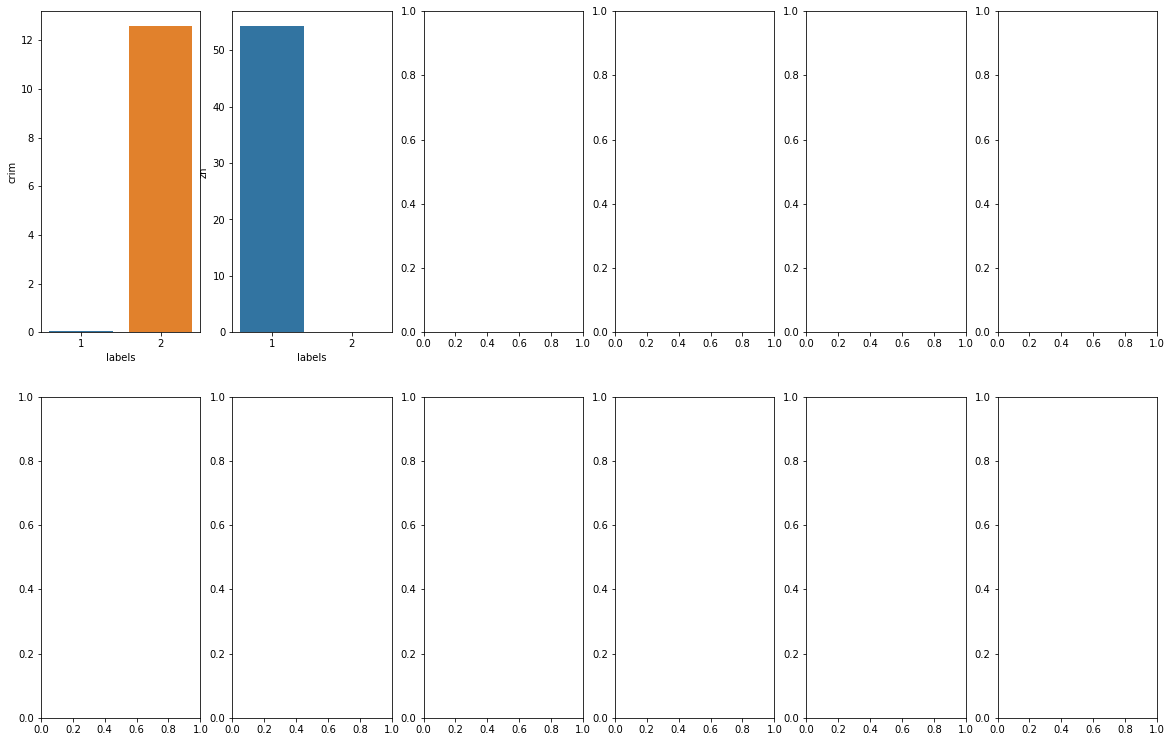

In [95]:
##시각화를 위해 subplot을 이용해보겠습니다.
##여러 그래프를 하나의 플랏에서 그리는..
## 2행 6열
f, ax = plt.subplots(2,6, figsize = (20 , 13))
##그릴을 채울려면  f, ax를 써야하는데
## ax가 자리를 설정
sns.barplot(x= 'labels', y = 'crim', data = group, ax = ax[0,0])
sns.barplot(x= 'labels', y = 'zn', data = group, ax = ax[0,1])

In [99]:
column = group.columns

In [102]:
column

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

In [101]:
column[1]

'crim'

In [133]:
for i in range(1,13):
    print([(i-1)//6,(5+i)%6])
    

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]


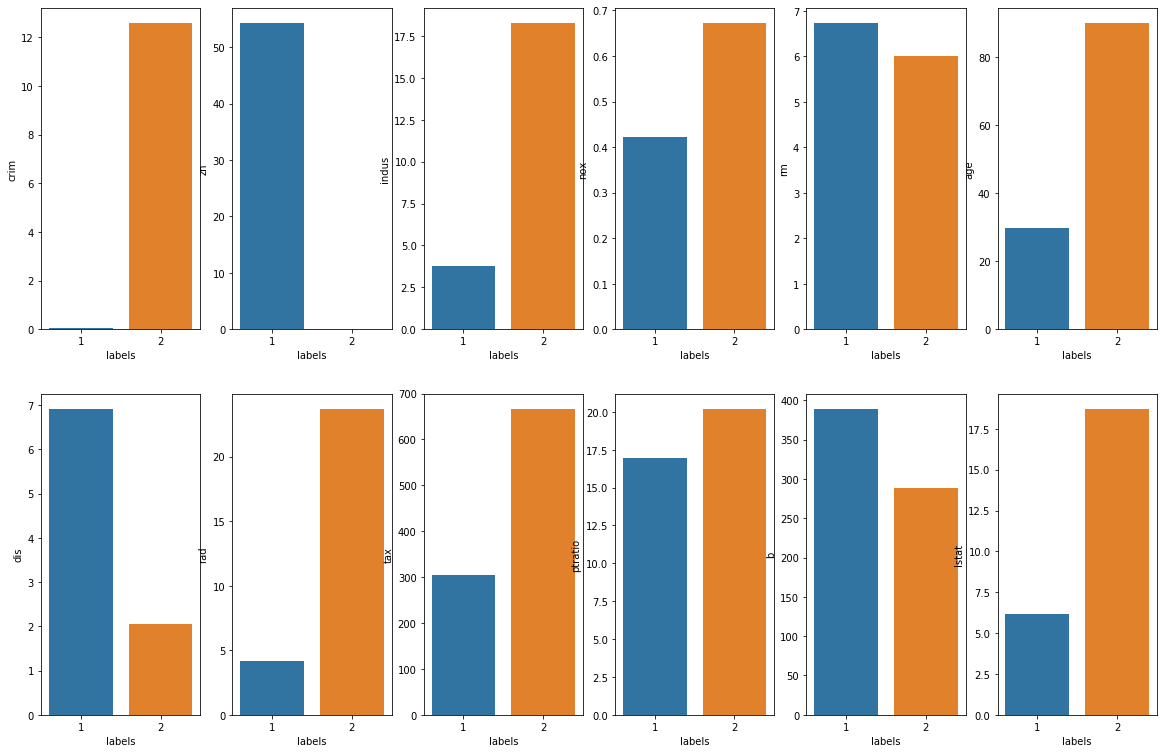

In [134]:
##이렇게 그리면 되는데 
##언제 12개를 그려 반복문 이용하자
f, ax = plt.subplots(2,6, figsize = (20,13))

for i in range(1,13):
    
    sns.barplot(x= 'labels', y = column[i], data = group, ax = ax[(i-1)//6, (5+i)%6 ] )
    

In [ ]:
###레이더 차트라는 것 이용하여 시각화를 한번 해보자

In [ ]:
##라벨 인코딩
##최상은 0 ,상위 1, 등으로 숫자로 바꾸어 범주화 하는 것,
##하지만 범주화를 함부로 수치화하면 문제가 생긴다했다.
#### 그럴때는 원핫인코딩을 써보자 (1,0,0,0) (0,1,0,0) 이런식으로 구분하게 만드는 것